# Keras MNIST with SKIL Deployment

In [1]:
from skil import Skil, WorkSpace, Experiment, Model, Deployment
from keras.datasets import mnist

Using TensorFlow backend.


## SKIL server

Central class for managing connections with the SKIL server.

**Arguments**:
* **workspace_server_id**: None by default, only specify if you want to connect to a non-default SKIL workspace server.
* **host**: string, Host on which the SKIL server runs.
* **port**: integer, Port on which the SKIL host runs.
* **debug**: boolean, set to false for more verbose logging.
* **user_id**: user name for your SKIL server connection.
* **password**: password of the provided SKIL user.

In [2]:
skil_server = Skil(
    workspace_server_id=None,
    host='localhost',
    port=9008,
    debug=False,
    user_id='your username',
    password='your password'
)

'>>> Authenticating SKIL...'
'>>> Done!'


## WorkSpace

Workspaces are a collection of features that enable different tasks such as conducting experiments, training models, and test different dataset transforms.

Workspaces are distinct from Deployments by operating as a space for non-production work.
    
**Arguments**:
* **skil**: Skil server instance
* **name**: string. Name for the workspace.
* **labels**: string. Labels associated with the workspace, useful for searching (comma seperated).
* **verbose**: boolean. If True, api response will be printed.
* **create**: boolean. Internal. Do not use.


In [3]:
work_space = WorkSpace(
    skil   =skil_server, 
    name   ='keras-mnist', 
    labels ='keras,mnist', 
    verbose=False
)

## Experiments  

Experiments in SKIL are useful for defining different model configurations, 
encapsulating training of models, and carrying out different data cleaning tasks.

Experiments have a one-to-one relationship with Notebooks and have their own 
storage mechanism for saving different model configurations when seeking a best 
candidate.

**Arguments**:
* **work_space**: `WorkSpace` instance. If `None` a workspace will be created.
* **experiment_id**: integer. Unique id for workspace. If `None`, a unique id will be generated.
* **name**: string. Name for the experiment.
* **description**: string. Description for the experiment.
* **verbose**: boolean. If `True`, api response will be printed.

In [4]:
experiment = Experiment(
    work_space=work_space,
    experiment_id=None,
    name='mnist-experiment',
    description='keras mnist experiment',
    verbose=False
)

## Model    
SKIL wrapper for DL4J, Keras, TensorFlow and other models

SKIL has a robust model storage, serving, and import system for supporting major 
deep learning libraries.

SKIL can be used for end-to-end training, configuration, and deployment of models 
or alternatively you can import models into SKIL.

**Arguments**
* **model**: Model file path or  model instance
* **model_id**: integer. Unique id for model. If `None`, a unique id will be generated.
* **name**: string. Name for the model.
* **version**: integer. Version of the model. Defaults to 1.
* **experiment**: `Experiment` instance. If `None`, an `Experiment` object will be created internally.
* **labels**: string. Labels for this model
* **verbose**: boolean. If `True`, prints api response.
* **create**: boolean. Internal. Do not use.

In [5]:
model = Model(
    model='model.h5', 
    model_id=None, 
    name='keras-mnist',
    experiment=experiment,
    labels=''
)

'>>> Uploading model, this might take a while...'
[   {'file_content': None,
 'file_name': 'model.h5',
 'key': 'file',
 'path': '/opt/skil/plugins/files/MODEL/model.h5',
 'status': 'uploaded',
 'type': None}]


## Deployment

Deployments operate independently of workspaces to ensure that there are
no accidental interruptions or mistakes in a production environment.

**Arguments:**
* **skil**: `Skil` server instance.
* **name**: string. Name for the deployment.
* **id**: Unique id for the deployment. If `None`, a unique id will be generated.

In [7]:
deployment = Deployment(
    skil=skil_server,
    name='keras-mnist-dep'
)

### Deploys the model

**Arguments:**
* deployment: `Deployment` instance.
* start_server: boolean. If `True`, the service is immedietely started.
* scale: integer. Scale-out for deployment.
* input_names: list of strings. Input variable names of the model.
* output_names: list of strings. Output variable names of the model.
* verbose: boolean. If `True`, api response will be printed.

In [8]:
service = model.deploy(
    deployment=deployment,
    start_server=True,
    scale=1,
    input_names=None,
    output_names=None,
    verbose=True
)

{'created': 1554877718222,
 'deployment_id': 4,
 'extra_args': None,
 'file_location': None,
 'id': 2,
 'jvm_args': None,
 'labels_file_location': None,
 'launch_policy': {'@class': 'io.skymind.deployment.launchpolicy.DefaultLaunchPolicy',
                   'maxFailuresMs': 300000,
                   'maxFailuresQty': 3},
 'model_state': None,
 'model_type': 'model',
 'name': 'keras-mnist',
 'scale': 1.0,
 'state': 'stopped',
 'sub_type': None,
 'updated': None}
'>>> Starting to serve model...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Waiting for deployment...'
'>>> Model server started successfully!'


## Prediction

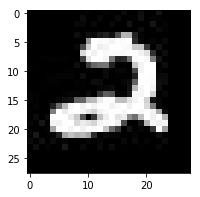

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("images/mnist.jpg", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(3,3))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
image = np.squeeze(image.reshape(1,-1))
image.shape

(784,)

In [14]:
predicted = service.predict_single(image)
print('Predicted:',predicted)
print('Target Class:',np.argmax(predicted))

Predicted: [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Target Class: 2
